In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

In [58]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [60]:
print(df.columns.tolist())

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [61]:
titanic=df[['survived','pclass', 'sex', 'age','sibsp', 
            'parch', 'fare', 'embark_town','alone']].copy()

<Axes: >

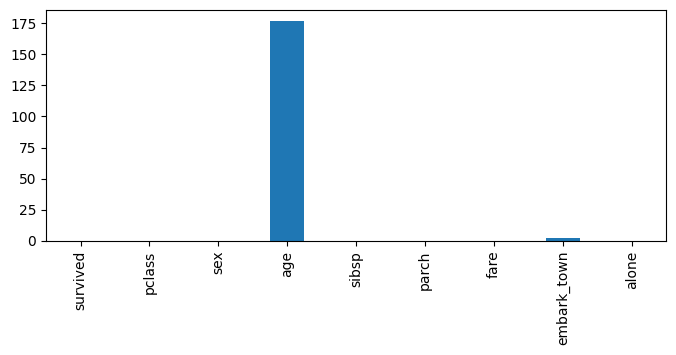

In [62]:
titanic.isnull().sum().plot(kind='bar', figsize=(8,3))

<Axes: >

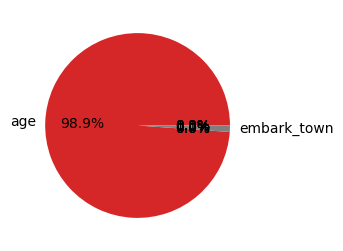

In [63]:
titanic.isnull().sum().plot(kind='pie', figsize=(8,3),autopct='%.1f%%')

In [64]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embark_town      2
alone            0
dtype: int64

fix missing data
- numaric:mean
- categorical:mode

In [65]:
avg_age=round(titanic['age'].mean())
print(f'Average age : {avg_age:.1f}')

Average age : 30.0


In [66]:
titanic['age'].fillna(avg_age,inplace=True) #fillna fill the null values in colum

In [67]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [68]:
titanic['embark_town'].value_counts().idxmax()
most_embark_town=titanic['embark_town'].value_counts().idxmax()
titanic['embark_town'].fillna(most_embark_town)

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [69]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [70]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [71]:
most_embark_town=titanic['embark_town'].value_counts().idxmax()
titanic['embark_town'].fillna(most_embark_town,inplace=True)

In [72]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embark_town    0
alone          0
dtype: int64

# selection of data

In [73]:
# only numarical colums from titanic
df.select_dtypes(include=np.number)

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [76]:
# only object colums from titanic
df.select_dtypes(include=np.object_)

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


In [77]:
# only object colums from bool
df.select_dtypes(include=np.bool_)

,adult_male,alone
0,True,False
1,False,False
2,False,True
3,False,False
4,True,True
...,...,...
886,True,True
887,False,True
888,False,False
889,True,True


In [78]:
titanic.describe() #data discription in terms of mean median mode stander devision min max etc

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
titanic.describe(include=[object,bool])

,sex,embark_town,alone
count,891,891,891
unique,2,3,2
top,male,Southampton,True
freq,577,646,537


In [80]:
# group pclass and count total survived
titanic.groupby(['pclass',"survived"])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

In [86]:
titanic.groupby(['sex',"survived"])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

In [87]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [88]:
titanic.sort_values(by='age',ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
630,1,1,male,80.00,0,0,30.0000,Southampton,True
851,0,3,male,74.00,0,0,7.7750,Southampton,True
96,0,1,male,71.00,0,0,34.6542,Cherbourg,True
493,0,1,male,71.00,0,0,49.5042,Cherbourg,True
116,0,3,male,70.50,0,0,7.7500,Queenstown,True
...,...,...,...,...,...,...,...,...,...
831,1,2,male,0.83,1,1,18.7500,Southampton,False
469,1,3,female,0.75,2,1,19.2583,Cherbourg,False
644,1,3,female,0.75,2,1,19.2583,Cherbourg,False
755,1,2,male,0.67,1,1,14.5000,Southampton,False
